Diskon yang diberikan: 25.00%


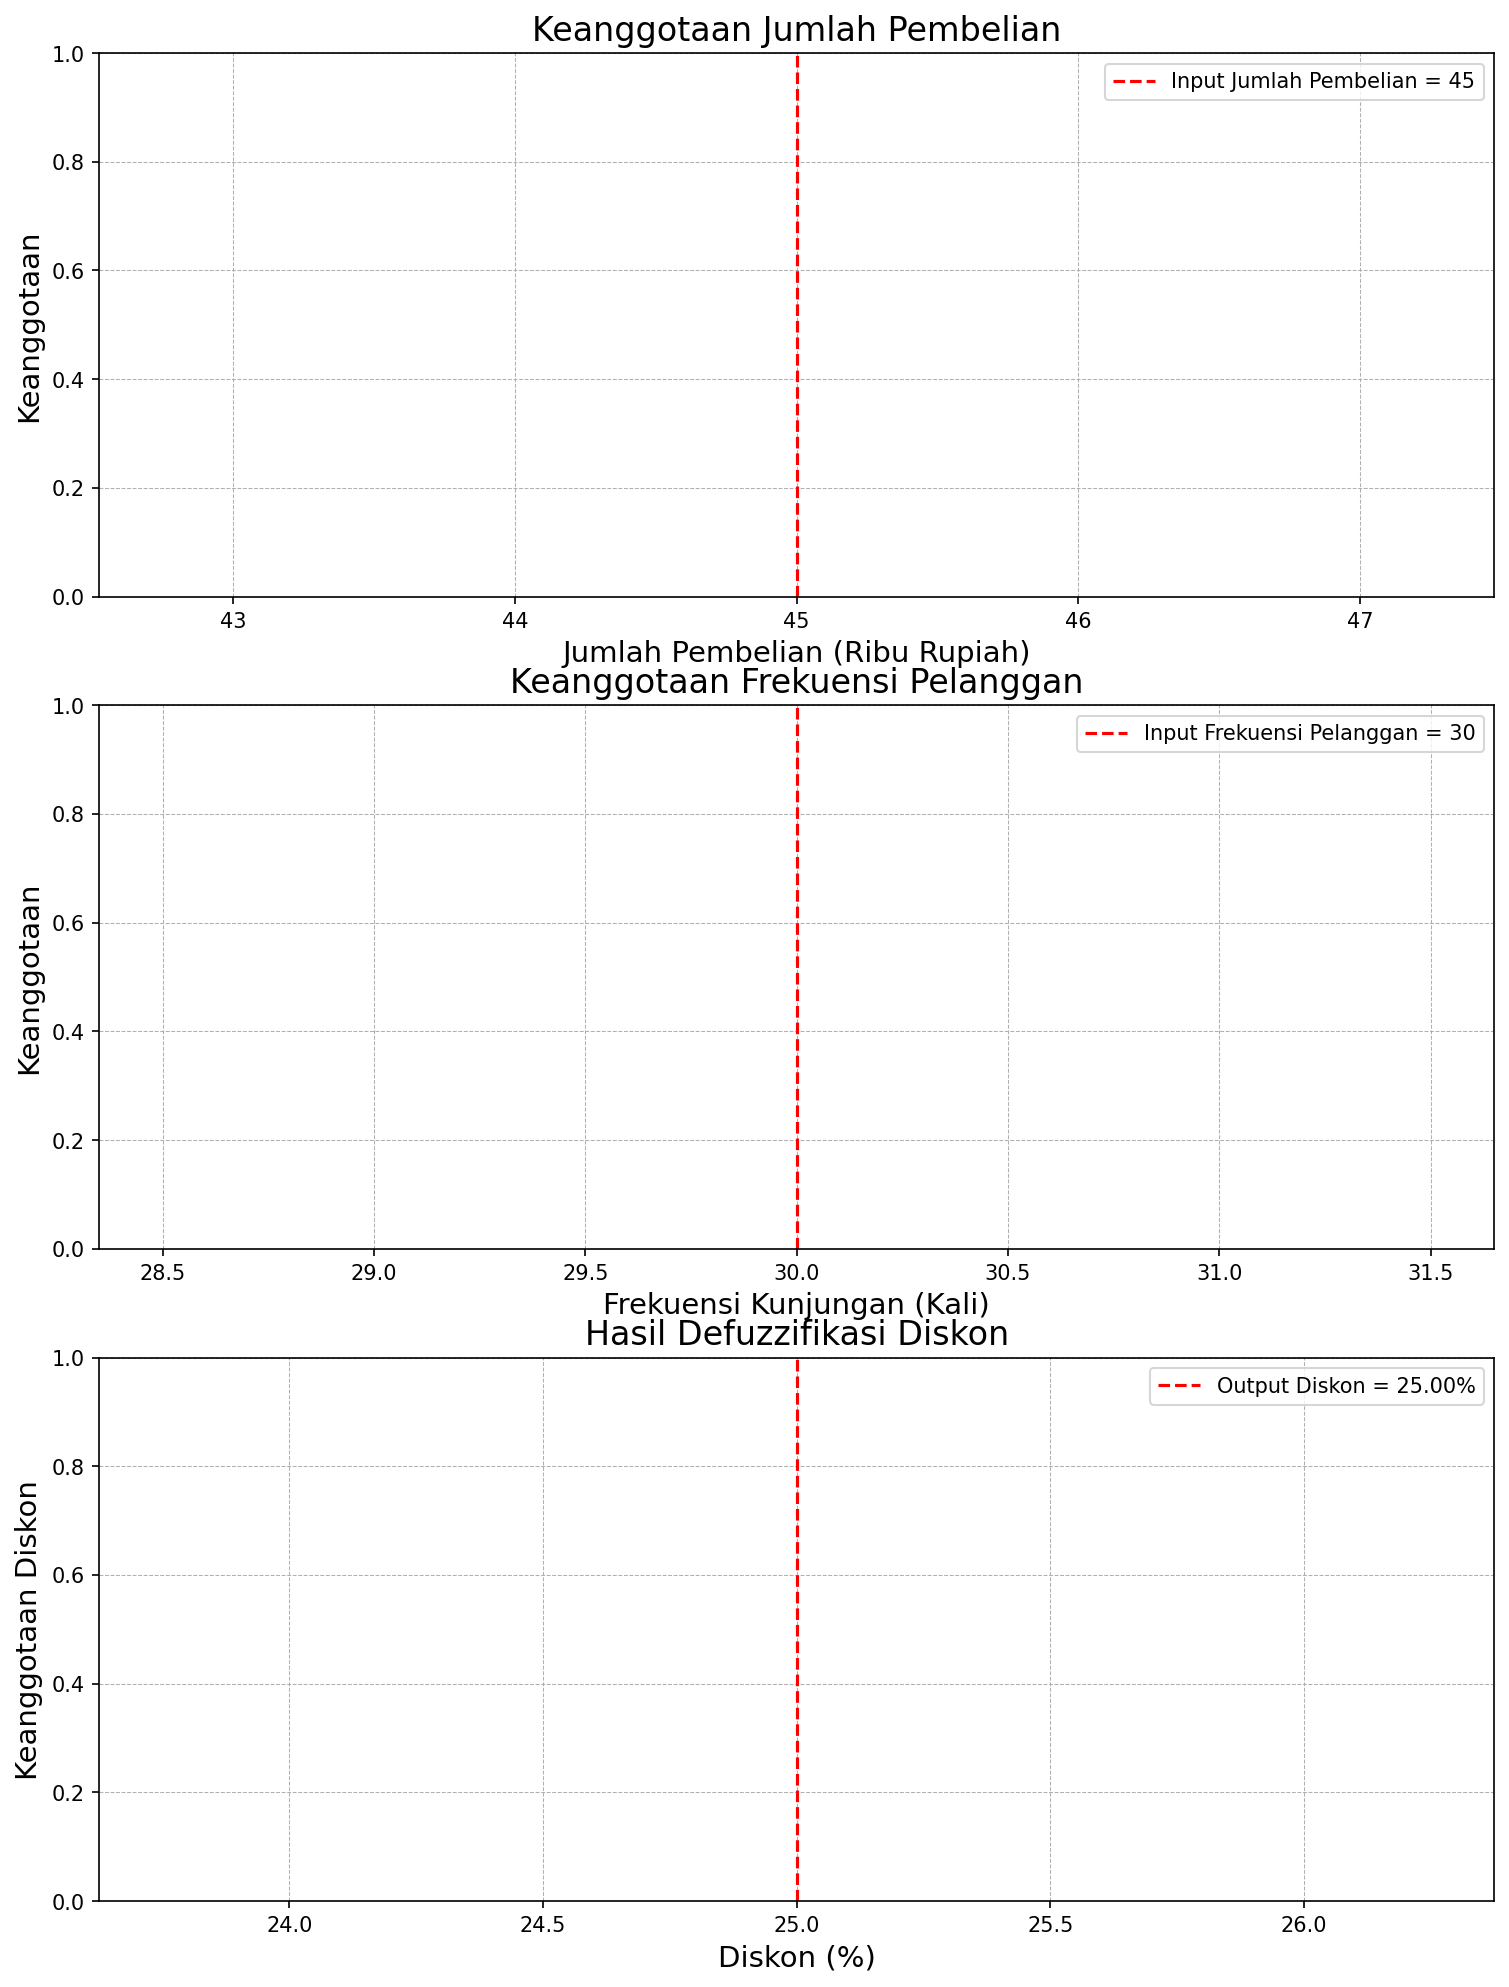

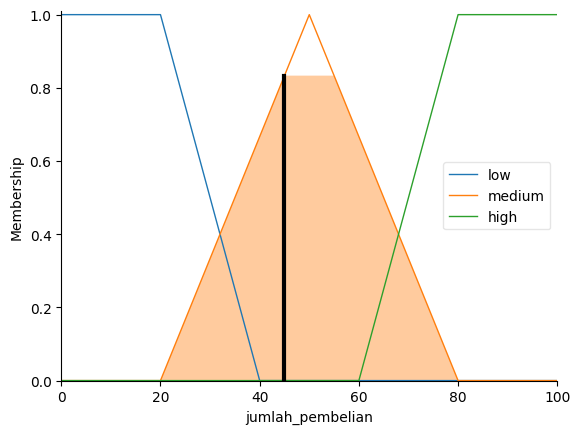

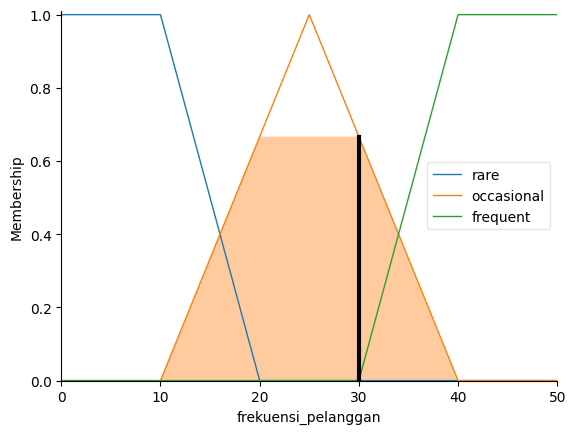

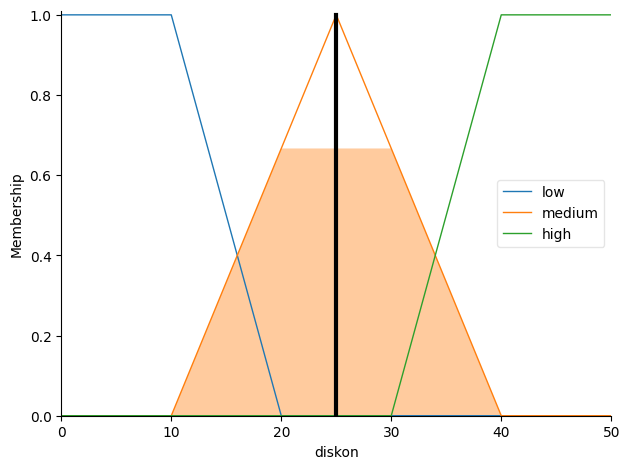

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definisi variabel fuzzy
jumlah_pembelian = ctrl.Antecedent(np.arange(0, 101, 1), 'jumlah_pembelian')
frekuensi_pelanggan = ctrl.Antecedent(np.arange(0, 51, 1), 'frekuensi_pelanggan')
diskon = ctrl.Consequent(np.arange(0, 51, 1), 'diskon')

# 2. Definisi himpunan fuzzy
jumlah_pembelian['low'] = fuzz.trapmf(jumlah_pembelian.universe, [0, 0, 20, 40])
jumlah_pembelian['medium'] = fuzz.trimf(jumlah_pembelian.universe, [20, 50, 80])
jumlah_pembelian['high'] = fuzz.trapmf(jumlah_pembelian.universe, [60, 80, 100, 100])

frekuensi_pelanggan['rare'] = fuzz.trapmf(frekuensi_pelanggan.universe, [0, 0, 10, 20])
frekuensi_pelanggan['occasional'] = fuzz.trimf(frekuensi_pelanggan.universe, [10, 25, 40])
frekuensi_pelanggan['frequent'] = fuzz.trapmf(frekuensi_pelanggan.universe, [30, 40, 50, 50])

diskon['low'] = fuzz.trapmf(diskon.universe, [0, 0, 10, 20])
diskon['medium'] = fuzz.trimf(diskon.universe, [10, 25, 40])
diskon['high'] = fuzz.trapmf(diskon.universe, [30, 40, 50, 50])

# 3. Definisi aturan fuzzy
rule1 = ctrl.Rule(jumlah_pembelian['low'] & frekuensi_pelanggan['rare'], diskon['low'])
rule2 = ctrl.Rule(jumlah_pembelian['low'] & frekuensi_pelanggan['occasional'], diskon['low'])
rule3 = ctrl.Rule(jumlah_pembelian['low'] & frekuensi_pelanggan['frequent'], diskon['medium'])

rule4 = ctrl.Rule(jumlah_pembelian['medium'] & frekuensi_pelanggan['rare'], diskon['low'])
rule5 = ctrl.Rule(jumlah_pembelian['medium'] & frekuensi_pelanggan['occasional'], diskon['medium'])
rule6 = ctrl.Rule(jumlah_pembelian['medium'] & frekuensi_pelanggan['frequent'], diskon['high'])

rule7 = ctrl.Rule(jumlah_pembelian['high'] & frekuensi_pelanggan['rare'], diskon['medium'])
rule8 = ctrl.Rule(jumlah_pembelian['high'] & frekuensi_pelanggan['occasional'], diskon['high'])
rule9 = ctrl.Rule(jumlah_pembelian['high'] & frekuensi_pelanggan['frequent'], diskon['high'])

# 4. Membuat kontrol sistem
diskon_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
diskon_sim = ctrl.ControlSystemSimulation(diskon_ctrl)

# 5. Input nilai dan simulasi
diskon_sim.input['jumlah_pembelian'] = 45  # 45 ribu
diskon_sim.input['frekuensi_pelanggan'] = 30  # 30 kali kunjungan

# Proses simulasi
diskon_sim.compute()

# Output hasil
print(f"Diskon yang diberikan: {diskon_sim.output['diskon']:.2f}%")

# 6. Visualisasi dengan peningkatan resolusi dan penyesuaian area kosong
fig, axes = plt.subplots(3, 1, figsize=(12, 16), dpi=150)

# Visualisasi jumlah pembelian
jumlah_pembelian.view(sim=diskon_sim)
axes[0].set_title('Keanggotaan Jumlah Pembelian', fontsize=16)
axes[0].set_xlabel('Jumlah Pembelian (Ribu Rupiah)', fontsize=14)
axes[0].set_ylabel('Keanggotaan', fontsize=14)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].axvline(x=45, color='r', linestyle='--', label="Input Jumlah Pembelian = 45")
axes[0].legend()

# Visualisasi frekuensi pelanggan
frekuensi_pelanggan.view(sim=diskon_sim)
axes[1].set_title('Keanggotaan Frekuensi Pelanggan', fontsize=16)
axes[1].set_xlabel('Frekuensi Kunjungan (Kali)', fontsize=14)
axes[1].set_ylabel('Keanggotaan', fontsize=14)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].axvline(x=30, color='r', linestyle='--', label="Input Frekuensi Pelanggan = 30")
axes[1].legend()

# Visualisasi diskon
diskon.view(sim=diskon_sim)
axes[2].set_title('Hasil Defuzzifikasi Diskon', fontsize=16)
axes[2].set_xlabel('Diskon (%)', fontsize=14)
axes[2].set_ylabel('Keanggotaan Diskon', fontsize=14)
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[2].axvline(x=diskon_sim.output['diskon'], color='r', linestyle='--', label=f"Output Diskon = {diskon_sim.output['diskon']:.2f}%")
axes[2].legend()

# Mengatur layout agar lebih rapi
plt.tight_layout()
plt.show()
